In [1]:
import pandas as pd
stroke= pd.read_csv('..\Datasets\stroke_data.csv')

In [2]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke.drop(['id'],axis=1,inplace=True)

In [4]:
stroke.dropna(inplace=True)

In [5]:
stroke['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [6]:
stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Analysis

In [7]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [8]:
stroke['work_type'].value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

Target variable with value 0 : 4700
Target variable with value 1 : 209


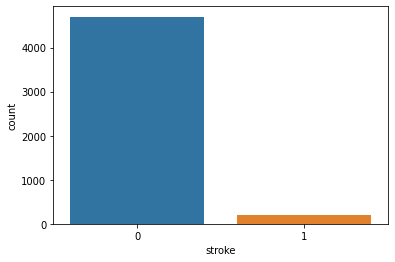

In [9]:
import seaborn as sns
sns.countplot(x = 'stroke',data = stroke)
print("Target variable with value 0 : "+ format(len(stroke.loc[stroke['stroke']==0])))
print("Target variable with value 1 : "+ format(len(stroke.loc[stroke['stroke']==1])))

In [10]:
stroke1=stroke.copy(deep=True)
stroke1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
stroke1['code_gender'] = stroke1.gender.astype('category').cat.codes
stroke1['code_ever_married']=stroke['ever_married'].astype('category').cat.codes
stroke1['code_work_type'] = stroke['work_type'].astype('category').cat.codes
stroke1['code_Residence_type'] = stroke['Residence_type'].astype('category').cat.codes
stroke1['code_smoking_status'] = stroke['smoking_status'].astype('category').cat.codes

In [12]:
stroke1.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,code_gender,code_ever_married,code_work_type,code_Residence_type,code_smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,2,1,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1,2,0,2
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1,2,1,3
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,3,0,2
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,1,2,1,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,1,1,2,0,2
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,0,0,2,1,2
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,0,1,2,1,0
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1,0,1,2,0,2
11,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1,0,1,0,0,3


In [13]:
stroke['gender'] = stroke.gender.astype('category').cat.codes
stroke['ever_married'] = stroke['ever_married'].astype('category').cat.codes
stroke['work_type'] = stroke['work_type'].astype('category').cat.codes
stroke['Residence_type'] = stroke['Residence_type'].astype('category').cat.codes
stroke['smoking_status'] = stroke['smoking_status'].astype('category').cat.codes

In [14]:
stroke1['work_type'].value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [15]:
gender_dict={"Male":1,"Female":0}
married_dict={"Yes":1,"No":0}
work_dict={"Govt_job":0,"Never_worked ":1,"Private":2,"Self-employed":3,"children":4}
residence_code={"Urban":1,"Rural":0}
smoking_code={"Unknown":0,"formerly smoked":1,"never smoked":2,"smokes":3}

# Model Creation

In [16]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [17]:
X = stroke[:,stroke.columns!='stroke']
Y = stroke['stroke'].values

TypeError: '(slice(None, None, None), array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False]))' is an invalid key

In [ ]:
X

In [ ]:
#from imblearn.over_sampling import RandomOverSampler
#oversample=RandomOverSampler(sampling_strategy='minority')
#X, Y = oversample.fit_resample(X, Y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.35,random_state=0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

# Model File

In [ ]:
import joblib 
joblib.dump(model, 'model.pkl',compress=1)

In [ ]:
#Sample prediction for Random Input
import numpy as np
load_model = joblib.load('model.pkl')
values = np.transpose(np.array([[0], [0.743652], [0], [1], [1], [0], [0], [0.301634], [0.303551],[1]]))
values.reshape(1, -1)
predictions = load_model.predict(values)

In [ ]:
predictions